# Stock Predictor using RNN regression and Time Series Analysis

This is a Stock Price Predictor that predicts Apple stock prices for a week using Recurrent Neural Network Regression using time series analysis method.

I employed the LTSM architecture for RNN since that optimizes classification and predictions when using time series data to avoid issues arising from potentially unknown discrepancies in events in data based on time series.

## 1: Import Libraries and the Dataset

The dataset is a time series data with information of Apple's stock price for 140 days. Performing data-preprocessing to apply it with the RNN regression algorithm by normalizing the data so that it is organized and set in a common scale. It increases the cohesion of entry types leading to cleansing, lead generation, segmentation, and higher quality data.


In [1]:
# Import Libraries and normalize data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset and normalize
dataset = np.loadtxt('data/normalized_apple_prices.csv')

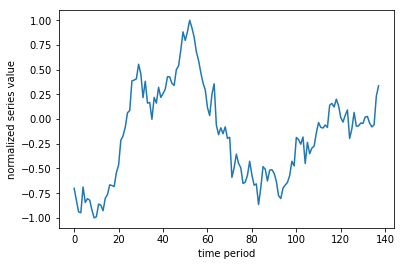

In [2]:
#Visualize given time series
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

## 2: Splitting the time-series into sequences

In [3]:
### Function to transform the time series into a set of sequences for RNN
def window_transform_series(series,window_size):
    X = []
    y = []
    
    for i in range(window_size, len(series)):
        X.append(series[i - window_size:i])
        y.append(series[i])
        
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    return X,y

In [4]:
# Use window function to window the data
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)

## Step 3: Split training and testing sets

Splitting Dataset into 2/3 and 1/3rd parts. 2/3 will be split as training set and the other 1/3 is for the test set in order to get accurate predictions.  

In [5]:
# split our dataset into training and test set and set point of split
train_test_split = int(np.ceil(2*len(y)/float(3)))

#create training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

#create test set
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

## 4: Building and execulting RNN regression model

Setting up RNN. We use Keras to build two hidden layers for RNN of the following specifications using tensorflow as backend.

In [6]:
# import keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# start with random seed
np.random.seed(0)


# Build an RNN to perform regression on time series
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))

optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss='mean_squared_error', optimizer=optimizer)

Using TensorFlow backend.


Now, training the training set

In [7]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1)

Epoch 1/500
88/88 [==============================] - 0s - loss: 0.1429     
Epoch 2/500
88/88 [==============================] - 0s - loss: 0.1351     
Epoch 3/500
88/88 [==============================] - 0s - loss: 0.1295     
Epoch 4/500
88/88 [==============================] - 0s - loss: 0.1248     
Epoch 5/500
88/88 [==============================] - 0s - loss: 0.1210     
Epoch 6/500
88/88 [==============================] - 0s - loss: 0.1173     
Epoch 7/500
88/88 [==============================] - 0s - loss: 0.1143     
Epoch 8/500
88/88 [==============================] - 0s - loss: 0.1113     
Epoch 9/500
88/88 [==============================] - 0s - loss: 0.1083     
Epoch 10/500
88/88 [==============================] - 0s - loss: 0.1054     
Epoch 11/500
88/88 [==============================] - 0s - loss: 0.1025     
Epoch 12/500
88/88 [==============================] - 0s - loss: 0.0999     
Epoch 13/500
88/88 [==============================] - 0s - loss: 0.0972     
Epoch 14

## 5: Predict results and Visualize Data

In [8]:
# Predict Stocks for both the sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [9]:
# Find Accuracy of the model
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0167954047634
testing error = 0.0139607680572


Visualization of Data 

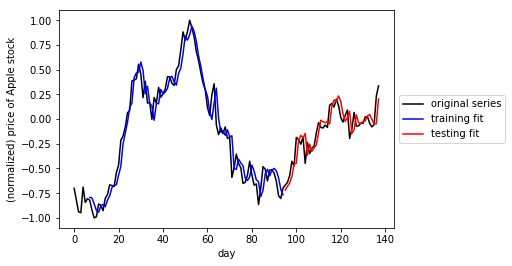

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#Visualize Given Dataset
plt.plot(dataset,color = 'k')

#Visualize Training Set
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

#Visualize Test Set
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()